In [24]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import re
import numpy as np
import csv



# Convert to DF

In [ ]:
import glob

csv_dir_powersave = 'data/powersave_intervention/battery_1min_600Hz(img)/energy_logs' 
csv_dir_ondemand = 'data/before_intervention/battery_1min_600Hz(img)/energy_logs'  # change if needed
csv_dir_conservative = 'data/conservative_intervention/battery_1min_600Hz(img)/energy_logs'

# Pattern to match your energy_logs files
pattern_powersave = os.path.join(csv_dir_powersave, 'energy_logs_*.csv')
pattern_ondemand = os.path.join(csv_dir_ondemand, 'energy_logs_*.csv')
pattern_conservative = os.path.join(csv_dir_conservative, 'energy_logs_*.csv')

dataframes_psv = {}
dataframes_ond = {}
dataframes_cons = {}

# IDLE
for file_path in sorted(glob.glob(pattern_powersave)):
    df_name = os.path.splitext(os.path.basename(file_path))[0]
    dataframes_psv[df_name] = pd.read_csv(file_path)

for file_path in sorted(glob.glob(pattern_ondemand)):
    df_name = os.path.splitext(os.path.basename(file_path))[0]
    dataframes_ond[df_name] = pd.read_csv(file_path)

for file_path in sorted(glob.glob(pattern_conservative)):
    df_name = os.path.splitext(os.path.basename(file_path))[0]
    dataframes_cons[df_name] = pd.read_csv(file_path)

# for name, df in dataframes_before.items():
#     print(f"DF IDLE: {name}: {len(df)} rows")

# IMG
# for file_path in sorted(glob.glob(pattern_after)):
#     df_name = os.path.splitext(os.path.basename(file_path))[0]
#     dataframes_after[df_name] = pd.read_csv(file_path)

# for name, df in dataframes_after.items():
#     print(f"DF IMG: {name}: {len(df)} rows")



# Let's apply the Energy formula, compute the average energy per run and per experiment.
## For the 2 experiments -> before interventions and after interventions

In [26]:
import pandas as pd
import os
import glob

DELTA_T = 1 / 600  # ≈ 0.00167 seconds

def compute_energy(df: pd.DataFrame, delta_t: float) -> float:
    return df['power_watts'].sum() * delta_t

def compute_energies(dataframes: dict, delta_t: float):
    return {name: compute_energy(df, delta_t) for name, df in dataframes.items()}

# Compute energy per run
energies_psv = compute_energies(dataframes_psv, DELTA_T)
energies_ond = compute_energies(dataframes_ond, DELTA_T)
energies_cons = compute_energies(dataframes_cons, DELTA_T)


# Convert to lists
psv = list(energies_psv.values())
ond = list(energies_ond.values())
cons = list(energies_cons.values())


# Summary statistics
def print_summary(name, values):
    print(f"{name}:")
    # computes mean energy based on each run / len of vals
    print(f"  Mean Energy: {sum(values)/len(values):.4f} J")
    # std dev - shows how spread out the data is
    print(f"  Std Dev: {pd.Series(values).std():.4f} J\n")

print_summary("Powersave", psv)
print_summary("Ondemand", ond)
print_summary("Conservative", cons)



Powersave:
  Mean Energy: 113.3171 J
  Std Dev: 1.7760 J

Ondemand:
  Mean Energy: 117.6022 J
  Std Dev: 0.7128 J

Conservative:
  Mean Energy: 118.1140 J
  Std Dev: 1.1667 J



# Energy vs time

/var/folders/87/xbc8k_k17_n921xhcp1k1hnc0000gn/T/ipykernel_2899/4040499162.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(energy_values, labels=governors, patch_artist=True)


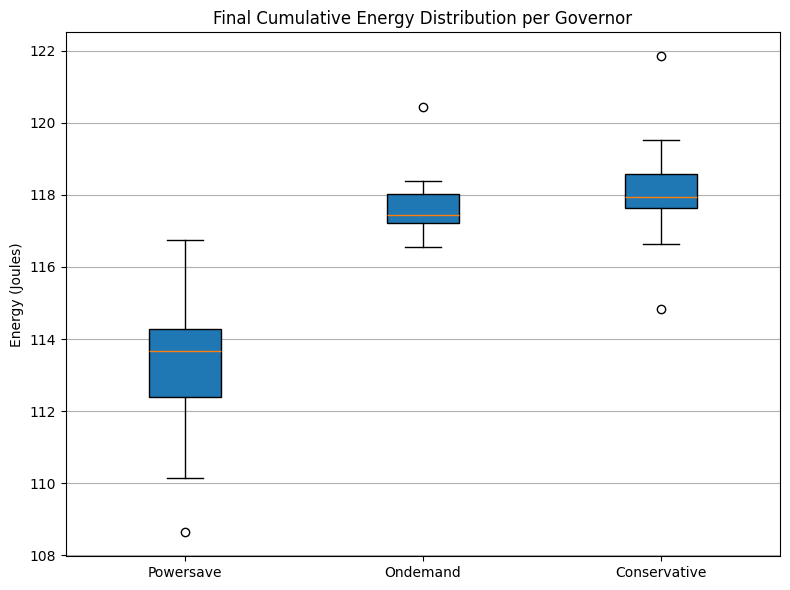

Summary Statistics:

Powersave:
  Mean     = 113.3171 J
  Median   = 113.6578 J
  Std Dev  = 1.7461 J
  Variance = 3.0490 J²
  Q1       = 112.3875 J
  Q3       = 114.2719 J
  IQR      = 1.8844 J

Ondemand:
  Mean     = 117.6022 J
  Median   = 117.4401 J
  Std Dev  = 0.7008 J
  Variance = 0.4911 J²
  Q1       = 117.2122 J
  Q3       = 118.0118 J
  IQR      = 0.7997 J

Conservative:
  Mean     = 118.1140 J
  Median   = 117.9416 J
  Std Dev  = 1.1471 J
  Variance = 1.3157 J²
  Q1       = 117.6233 J
  Q3       = 118.5766 J
  IQR      = 0.9533 J



In [27]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def get_total_energy(folder_path, sampling_rate_hz=600):
    """
    Reads all CSVs in a folder and returns total energy (in joules) per file.
    """
    dt = 1.0 / sampling_rate_hz
    total_energies = []

    for filename in sorted(os.listdir(folder_path)):
        if filename.endswith(".csv"):
            filepath = os.path.join(folder_path, filename)
            df = pd.read_csv(filepath)
            energy = (df['power_watts'] * dt).sum()
            total_energies.append(energy)

    return total_energies


def plot_final_energy_boxplot(all_final_energies):
    """
    Plots a boxplot of total energy per governor.
    all_final_energies: dict of {governor_name: list_of_final_energies}
    """
    plt.figure(figsize=(8, 6))
    governors = list(all_final_energies.keys())
    energy_values = [all_final_energies[gov] for gov in governors]

    plt.boxplot(energy_values, labels=governors, patch_artist=True)
    plt.title('Final Cumulative Energy Distribution per Governor')
    plt.ylabel('Energy (Joules)')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()


# === Replace with your actual paths ===
all_energies = {
    'Powersave': get_total_energy('data/powersave_intervention/battery_1min_600Hz(img)/energy_logs'),
    'Ondemand': get_total_energy('data/before_intervention/battery_1min_600Hz(img)/energy_logs'),
    'Conservative': get_total_energy('data/conservative_intervention/battery_1min_600Hz(img)/energy_logs'),
}

plot_final_energy_boxplot(all_energies)



print("Summary Statistics:\n")
for gov, energies in all_energies.items():
    energies_np = np.array(energies)
    mean = np.mean(energies_np)
    median = np.median(energies_np)
    std_dev = np.std(energies_np)
    variance = np.var(energies_np)
    q1 = np.percentile(energies_np, 25)
    q3 = np.percentile(energies_np, 75)
    iqr = q3 - q1

    print(f"{gov}:")
    print(f"  Mean     = {mean:.4f} J")
    print(f"  Median   = {median:.4f} J")
    print(f"  Std Dev  = {std_dev:.4f} J")
    print(f"  Variance = {variance:.4f} J²")
    print(f"  Q1       = {q1:.4f} J")
    print(f"  Q3       = {q3:.4f} J")
    print(f"  IQR      = {iqr:.4f} J\n")

# Cumulative energy per resolution

In [28]:

csv_dir_lowest = 'data/imaging_intervention/imaging_160/energy_logs' 
csv_dir_medium = 'data/imaging_intervention/imaging_352/energy_logs'  # change if needed
csv_dir_highest = 'data/before_intervention/battery_1min_600Hz(img)/energy_logs'


# Pattern to match your energy_logs files
pattern_powersave = os.path.join(csv_dir_lowest, 'energy_logs_*.csv')
pattern_ondemand = os.path.join(csv_dir_medium, 'energy_logs_*.csv')
pattern_conservative = os.path.join(csv_dir_highest, 'energy_logs_*.csv')


dataframes_psv = {}
dataframes_ond = {}
dataframes_cons = {}



# IDLE
for file_path in sorted(glob.glob(pattern_powersave)):
    df_name = os.path.splitext(os.path.basename(file_path))[0]
    dataframes_psv[df_name] = pd.read_csv(file_path)

for file_path in sorted(glob.glob(pattern_ondemand)):
    df_name = os.path.splitext(os.path.basename(file_path))[0]
    dataframes_ond[df_name] = pd.read_csv(file_path)

for file_path in sorted(glob.glob(pattern_conservative)):
    df_name = os.path.splitext(os.path.basename(file_path))[0]
    dataframes_cons[df_name] = pd.read_csv(file_path)

/var/folders/87/xbc8k_k17_n921xhcp1k1hnc0000gn/T/ipykernel_2899/3226665489.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(energy_values, labels=governors, patch_artist=True)


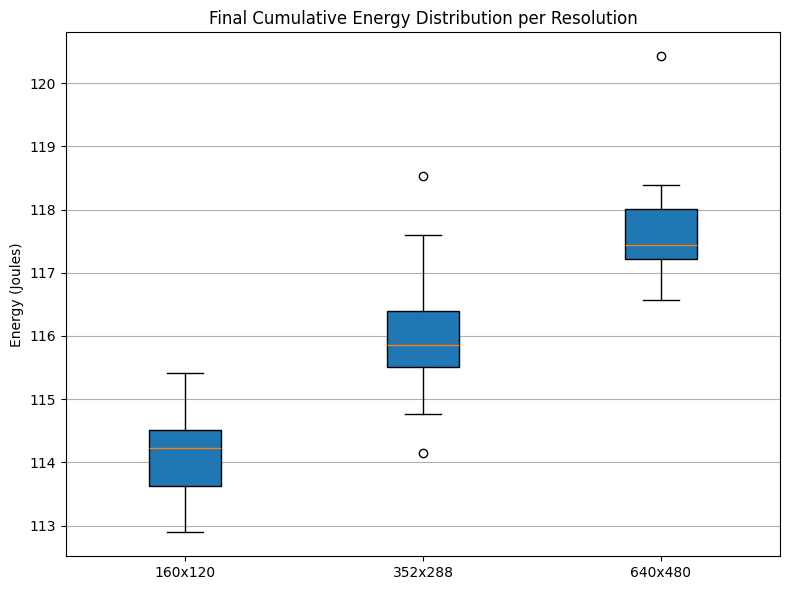

Summary Statistics:

160x120:
  Mean     = 114.1094 J
  Median   = 114.2334 J
  Std Dev  = 0.6452 J
  Variance = 0.4163 J²
  Q1       = 113.6276 J
  Q3       = 114.5076 J
  IQR      = 0.8800 J

352x288:
  Mean     = 115.9552 J
  Median   = 115.8613 J
  Std Dev  = 0.8923 J
  Variance = 0.7962 J²
  Q1       = 115.5016 J
  Q3       = 116.3951 J
  IQR      = 0.8934 J

640x480:
  Mean     = 117.6022 J
  Median   = 117.4401 J
  Std Dev  = 0.7008 J
  Variance = 0.4911 J²
  Q1       = 117.2122 J
  Q3       = 118.0118 J
  IQR      = 0.7997 J



In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def get_total_energy(folder_path, sampling_rate_hz=600):
    """
    Reads all CSVs in a folder and returns total energy (in joules) per file.
    """
    dt = 1.0 / sampling_rate_hz
    total_energies = []

    for filename in sorted(os.listdir(folder_path)):
        if filename.endswith(".csv"):
            filepath = os.path.join(folder_path, filename)
            df = pd.read_csv(filepath)
            energy = (df['power_watts'] * dt).sum()
            total_energies.append(energy)

    return total_energies


def plot_final_energy_boxplot(all_final_energies):
    """
    Plots a boxplot of total energy per resolution.
    all_final_energies: dict of {governor_name: list_of_final_energies}
    """
    plt.figure(figsize=(8, 6))
    governors = list(all_final_energies.keys())
    energy_values = [all_final_energies[gov] for gov in governors]

    plt.boxplot(energy_values, labels=governors, patch_artist=True)
    plt.title('Final Cumulative Energy Distribution per Resolution')
    plt.ylabel('Energy (Joules)')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()


# === Replace with your actual paths ===
all_energies = {
    '160x120': get_total_energy(csv_dir_lowest),
    '352x288': get_total_energy(csv_dir_medium),
    '640x480': get_total_energy(csv_dir_highest),
}

plot_final_energy_boxplot(all_energies)

print("Summary Statistics:\n")
for gov, energies in all_energies.items():
    energies_np = np.array(energies)
    mean = np.mean(energies_np)
    median = np.median(energies_np)
    std_dev = np.std(energies_np)
    variance = np.var(energies_np)
    q1 = np.percentile(energies_np, 25)
    q3 = np.percentile(energies_np, 75)
    iqr = q3 - q1

    print(f"{gov}:")
    print(f"  Mean     = {mean:.4f} J")
    print(f"  Median   = {median:.4f} J")
    print(f"  Std Dev  = {std_dev:.4f} J")
    print(f"  Variance = {variance:.4f} J²")
    print(f"  Q1       = {q1:.4f} J")
    print(f"  Q3       = {q3:.4f} J")
    print(f"  IQR      = {iqr:.4f} J\n")




In [30]:
import pandas as pd
import os
import glob

DELTA_T = 1 / 600  # ≈ 0.00167 seconds

def compute_energy(df: pd.DataFrame, delta_t: float) -> float:
    return df['power_watts'].sum() * delta_t

def compute_energies(dataframes: dict, delta_t: float):
    return {name: compute_energy(df, delta_t) for name, df in dataframes.items()}

# Compute energy per run
energies_psv = compute_energies(dataframes_psv, DELTA_T)
energies_ond = compute_energies(dataframes_ond, DELTA_T)
energies_cons = compute_energies(dataframes_cons, DELTA_T)


# Convert to lists
psv = list(energies_psv.values())
ond = list(energies_ond.values())
cons = list(energies_cons.values())


# Summary statistics
def print_summary(name, values):
    print(f"{name}:")
    # computes mean energy based on each run / len of vals
    print(f"  Mean Energy: {sum(values)/len(values):.4f} J")
    # std dev - shows how spread out the data is
    print(f"  Std Dev: {pd.Series(values).std():.4f} J\n")

print_summary("160x120", psv)
print_summary("352x288", ond)
print_summary("640x480", cons)



160x120:
  Mean Energy: 114.1094 J
  Std Dev: 0.6562 J

352x288:
  Mean Energy: 115.9552 J
  Std Dev: 0.9076 J

640x480:
  Mean Energy: 117.6022 J
  Std Dev: 0.7128 J



# Box plots for energy and power before and after interventions

In [31]:

import glob
csv_dir_before = 'data/baseline_on_track/energy_logs' 
csv_dir_after = 'data/final_intervention_on_track/energy_logs'  # change if needed


# Pattern to match your energy_logs files
pattern_before = os.path.join(csv_dir_before, 'energy_logs_*.csv')
pattern_after = os.path.join(csv_dir_after, 'energy_logs_*.csv')

dataframes_before = {}
dataframes_after = {}


# IDLE
for file_path in sorted(glob.glob(pattern_before)):
    df_name = os.path.splitext(os.path.basename(file_path))[0]
    dataframes_before[df_name] = pd.read_csv(file_path)

for file_path in sorted(glob.glob(pattern_after)):
    df_name = os.path.splitext(os.path.basename(file_path))[0]
    dataframes_after[df_name] = pd.read_csv(file_path)



Skipping energy_logs_25.csv due to total energy < 30 J (21.65 J).


/var/folders/87/xbc8k_k17_n921xhcp1k1hnc0000gn/T/ipykernel_2899/3646336851.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(energy_values, labels=governors, patch_artist=True)


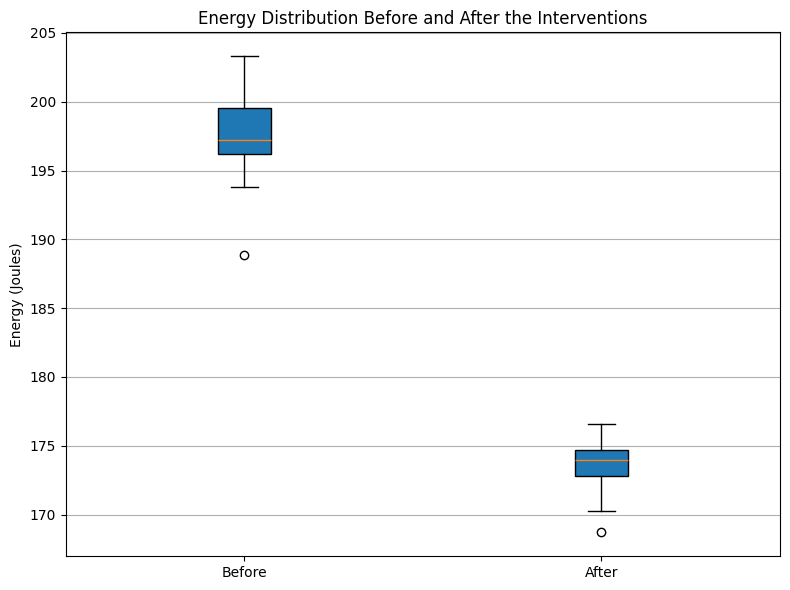

Summary Statistics:

Before:
  Mean     = 197.7078 J
  Median   = 197.2050 J
  Std Dev  = 2.8288 J
  Variance = 8.0024 J²
After:
  Mean     = 173.6295 J
  Median   = 173.9596 J
  Std Dev  = 1.7090 J
  Variance = 2.9206 J²


In [35]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def get_total_energy(folder_path, sampling_rate_hz=600):
    """
    Reads all CSVs in a folder and returns total energy (in joules) per file.
    """
    dt = 1.0 / sampling_rate_hz
    total_energies = []

    for filename in sorted(os.listdir(folder_path)):
        if filename.endswith(".csv"):
            filepath = os.path.join(folder_path, filename)
            df = pd.read_csv(filepath)

            energy = (df['power_watts'] * dt).sum()
            if energy < 30:
                print(f"Skipping {filename} due to total energy < 30 J ({energy:.2f} J).")
                continue
            total_energies.append(energy)


    return total_energies


def plot_final_energy_boxplot(all_final_energies):
    """
    Plots a boxplot of total energy per governor.
    all_final_energies: dict of {governor_name: list_of_final_energies}
    """
    plt.figure(figsize=(8, 6))
    governors = list(all_final_energies.keys())
    energy_values = [all_final_energies[gov] for gov in governors]

    plt.boxplot(energy_values, labels=governors, patch_artist=True)
    plt.title('Energy Distribution Before and After the Interventions')
    plt.ylabel('Energy (Joules)')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()


# === Replace with your actual paths ===
all_energies = {
    'Before': get_total_energy('data/baseline_on_track/energy_logs'),
    'After': get_total_energy('data/final_intervention_on_track/energy_logs'),
}

plot_final_energy_boxplot(all_energies)



print("Summary Statistics:\n")
for gov, energies in all_energies.items():
    energies_np = np.array(energies)
    mean = np.mean(energies_np)
    median = np.median(energies_np)
    std_dev = np.std(energies_np)
    variance = np.var(energies_np)

    print(f"{gov}:")
    print(f"  Mean     = {mean:.4f} J")
    print(f"  Median   = {median:.4f} J")
    print(f"  Std Dev  = {std_dev:.4f} J")
    print(f"  Variance = {variance:.4f} J²")

# Mean Power per experiment

In [109]:
# Compute mean power per run
mean_powers_before = [df['power_watts'].mean() for df in dataframes_before.values()]
mean_powers_after = [df['power_watts'].mean() for df in dataframes_after.values()]

# Compute mean power across all 30 runs per experiment
avg_power_before = sum(mean_powers_before) / len(mean_powers_before)
avg_power_after = sum(mean_powers_after) / len(mean_powers_after)

print(f"Mean Power Before Intervention: {avg_power_before:.4f} W")
print(f"Mean Power After Intervention: {avg_power_after:.4f} W")

Mean Power Before Intervention: 12.7334 W
Mean Power After Intervention: 11.1319 W


In [9]:
# Compute mean current per run
mean_current_before = [df['current_amps'].mean() for df in dataframes_before.values()]
mean_current_after = [df['current_amps'].mean() for df in dataframes_after.values()]

# Compute mean power across all 30 runs per experiment
avg_current_before = sum(mean_current_before) / len(mean_current_before)
avg_current_after = sum(mean_current_after) / len(mean_current_after)

print(f"Mean Current Before Intervention: {avg_current_before:.4f} A")
print(f"Mean Current After Intervention: {avg_current_after:.4f} A")

Mean Current Before Intervention: 0.7876 A
Mean Current After Intervention: 0.6867 A


# Bar plot for Mean Energy and Mean Power over the 2 experiments

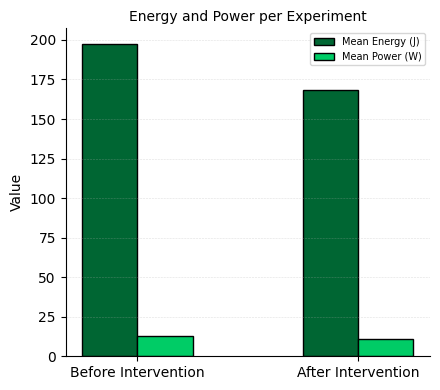

In [105]:
import matplotlib.pyplot as plt

# Data
experiments = ['Before Intervention', 'After Intervention']
mean_energy = [197.71, 168.56]
mean_power = [12.73, 11.13]

# Settings
bar_width = 0.25
x = [0, 1]  # one per experiment

# Plot
fig, ax = plt.subplots(figsize=(4.5, 4))

# Plot side-by-side bars by shifting positions

bars_energy = ax.bar([i - bar_width/2 for i in x], mean_energy, width=bar_width,
                     label='Mean Energy (J)', color='#006633', edgecolor='black')

bars_power = ax.bar([i + bar_width/2 for i in x], mean_power, width=bar_width,
                    label='Mean Power (W)', color='#00CC66', edgecolor='black')

# Axes and labels
ax.set_ylabel('Value')
ax.set_xticks(x)
ax.set_xticklabels(experiments, fontsize=10)
ax.set_title('Energy and Power per Experiment', fontsize=10, pad=5)
ax.legend(loc='upper right', fontsize=7)
ax.spines[['top', 'right']].set_visible(False)
ax.grid(axis='y', linestyle='--', linewidth=0.4, alpha=0.4)

# Save as PDF (optional)
plt.tight_layout()
plt.savefig("summary/all_3/energy_power_bars.pdf", format="pdf")

# Show plot
plt.show()


# Some overview of the data

In [110]:
energy_before = 197.7078 
energy_after = 168.5636

power_before = 12.7334
power_after = 11.1319

energy_saved_pct = (energy_before - energy_after) / energy_before * 100
power_saved_pct = (power_before - power_after) / power_before * 100

print("Percentage of Energy saved", round(energy_saved_pct, 2), '%')
print("Percentage of Power saved", round(power_saved_pct, 2), '%')



Percentage of Energy saved 14.74 %
Percentage of Power saved 12.58 %


# Powerstat Data Analysis on the Driving Scenario

# Plot power over time

In [120]:
import pandas as pd
import numpy as np
import os
from glob import glob

# Constants
DELTA_T = 1 / 600  # sampling interval for 600 Hz
LOG_FOLDER = "data/final_intervention_on_track/energy_logs"  # folder where your files are stored
FILE_PATTERN = os.path.join(LOG_FOLDER, "energy_logs_*.csv")
OUTPUT_FILE = "summary/all_3/avg_power_over_time_intervention.csv"

def load_power_traces(file_pattern):
    power_traces = []
    for file in sorted(glob(file_pattern)):
        if "energy_logs_25.csv" in file:
            print(f"Skipping corrupted file: {file}")
            continue
        df = pd.read_csv(file)
        if 'power_watts' not in df.columns:
            continue
        power = df['power_watts'].values
        power_traces.append(power)
    return power_traces

# Load and collect all power traces
traces = load_power_traces(FILE_PATTERN)

# Trim all traces to the shortest length
min_len = min(len(trace) for trace in traces)
trimmed_traces = np.array([trace[:min_len] for trace in traces])

# Compute time axis and mean power
time_axis = np.linspace(0, min_len * DELTA_T, min_len)
avg_power = trimmed_traces.mean(axis=0)

# Save to CSV
df_result = pd.DataFrame({
    'time_s': time_axis,
    'avg_power_w': avg_power
})
df_result.to_csv(OUTPUT_FILE, index=False)

print(f"Saved averaged power trace to: {OUTPUT_FILE}")


Skipping corrupted file: data/final_intervention_on_track/energy_logs/energy_logs_25.csv
Saved averaged power trace to: summary/all_3/avg_power_over_time_intervention.csv


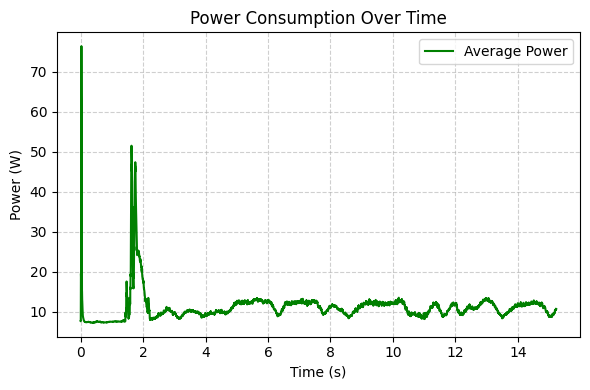

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the averaged energy data
df = pd.read_csv("summary/all_3/avg_power_over_time_intervention.csv")

# Plot
plt.figure(figsize=(6, 4))
plt.plot(df['time_s'], df['avg_power_w'], label='Average Power', color='green')

# Styling
plt.xlabel("Time (s)")
plt.ylabel("Power (W)")
plt.title("Power Consumption Over Time")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


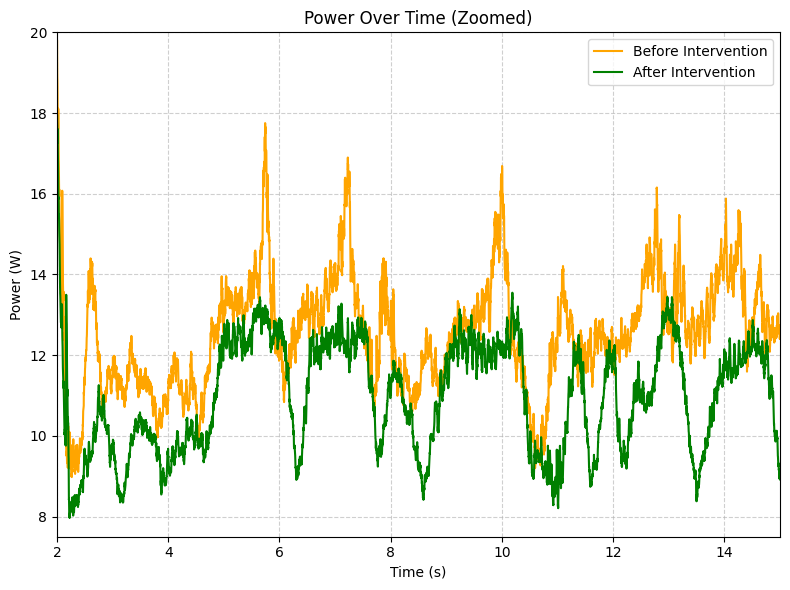

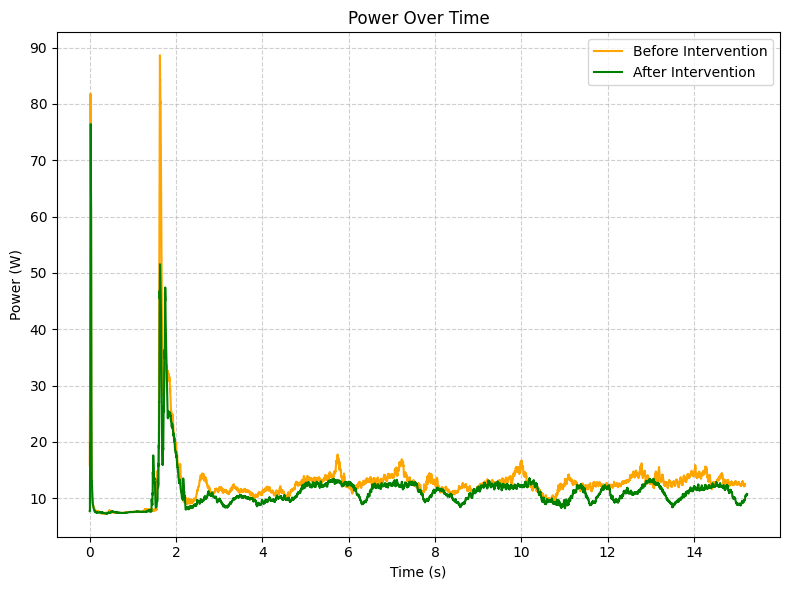

In [147]:
import pandas as pd
import matplotlib.pyplot as plt

# Load both CSVs
df_before = pd.read_csv("summary/all_3/avg_power_over_time.csv")
df_after = pd.read_csv("summary/all_3/avg_power_over_time_intervention.csv")

# Plot
plt.figure(figsize=(8, 6))
plt.plot(df_before['time_s'], df_before['avg_power_w'], label='Before Intervention', color='orange')
plt.plot(df_after['time_s'], df_after['avg_power_w'], label='After Intervention', color='green')

# Styling
plt.xlabel("Time (s)")
plt.ylabel("Power (W)")
plt.title("Power Over Time (Zoomed)")
plt.xlim(2, 15)  # Show only the first 3 seconds
plt.ylim(7.5, 20)  # Adjust to just above your spike
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

# Plot
plt.figure(figsize=(8, 6))
plt.plot(df_before['time_s'], df_before['avg_power_w'], label='Before Intervention', color='orange')
plt.plot(df_after['time_s'], df_after['avg_power_w'], label='After Intervention', color='green')

# Styling
plt.xlabel("Time (s)")
plt.ylabel("Power (W)")
plt.title("Power Over Time")
# plt.xlim(2, 10)  # Show only the first 3 seconds
# plt.ylim(7.5, 20)  # Adjust to just above your spike
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

plt.show()




# Bar plot highlighting the different battery voltage (6 cases)

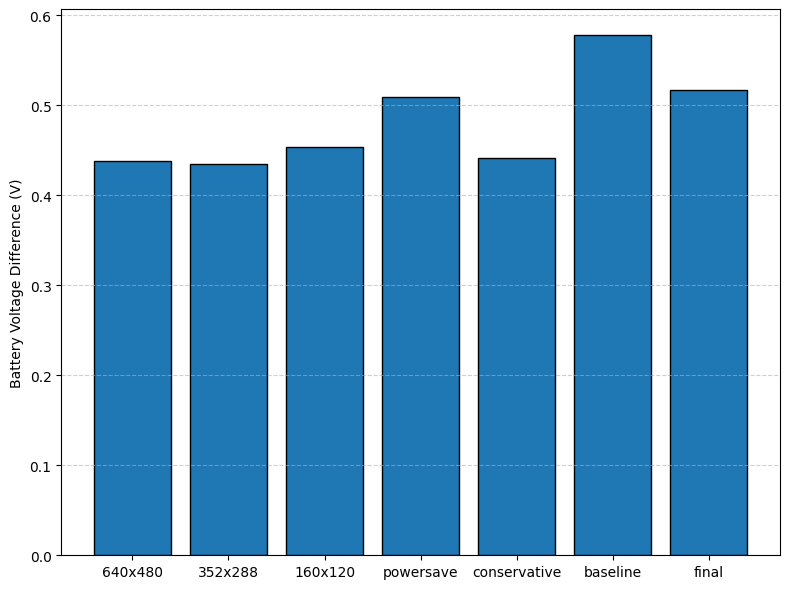

In [21]:
import matplotlib.pyplot as plt

# Data
labels = ['640x480', '352x288', '160x120', 'powersave', 'conservative', 'baseline', 'final']
values = [0.438, 0.435 , 0.454, 0.509, 0.442, 0.578, 0.517]

# Plot
plt.figure(figsize=(8, 6))
plt.bar(labels, values, edgecolor='black')

# Labels and title
plt.ylabel('Battery Voltage Difference (V)')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show plot
plt.tight_layout()
plt.show()
